In [238]:
import pickle
with open('../data/data2.pickle', 'rb') as f:
  data = pickle.load(f)

In [239]:
texts = data['joinwithout2n1']

my_stop_words = ['']

In [341]:
def flat(l):
    for k in l:
        if not isinstance(k, (list, tuple)):
            yield k
        else:
            yield from flat(k)
texts = list(flat(texts))

In [241]:
print(str(len(texts)) + ' texts')

38650 texts


First step: Deal with password without capital words

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer

# change the max_df to get different results

tfidf_vectorizer = TfidfVectorizer(max_df=0.9999, max_features=200000,
                                   min_df=0.0001, stop_words=my_stop_words, 
                                   use_idf=True, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

print(tfidf_matrix.shape)


CPU times: user 314 ms, sys: 3.98 ms, total: 318 ms
Wall time: 337 ms
(38650, 2632)


In [243]:
terms = tfidf_vectorizer.get_feature_names()
#terms

# MATRIX without numbers

In [205]:
text1 = datawithoutintegers

In [216]:
text1 = data['joinwithout2n1']
my_stop_words = ['']

In [217]:
def flat(l):
    for k in l:
        if not isinstance(k, (list, tuple)):
            yield k
        else:
            yield from flat(k)
text1 = list(flat(text1))

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

# change the max_df to get different results

tfidf_vectorizer1 = TfidfVectorizer(max_df=0.9999, max_features=200000,
                                   min_df=0.0001, stop_words=my_stop_words, 
                                   use_idf=True, ngram_range=(1,3), token_pattern=r'\b[a-zA-Z]{3,}\b')

%time tfidf_matrix1 = tfidf_vectorizer1.fit_transform(text1)

print(tfidf_matrix1.shape)


CPU times: user 224 ms, sys: 0 ns, total: 224 ms
Wall time: 222 ms
(38650, 2321)


In [220]:

text1

['   xao  ',
 'milan  ',
 'pan chart 1983',
 ' pink  123',
 'bulldog',
 'nere knu 9558285913',
 '  sek',
 '123456  ',
 'lumpy 1976',
 'simon  ',
 'kur vicky',
 'mlgqtazy ',
 'pema kuh  2834 ',
 'fer  man',
 '131619',
 'detail ist',
 'debus trol',
 'mixvibes 123',
 '161616',
 'hob lly ',
 'stano 2724',
 '19901807',
 '2925845',
 ' sen jet ',
 '565455',
 'ubopriqpjq',
 'mvl     ',
 '12082389',
 'tomas 2008',
 'jde mena ',
 '10581058',
 'kosmo 007',
 'floorball 305',
 'michal ',
 'aviat  ',
 'the encore ',
 ' per',
 ' giu   224',
 '14081982',
 'mam sarada 1984',
 'maktub',
 'vase  3962521993',
 'bul   ',
 'vandal 1982',
 'jackson',
 'partizan 001',
 'cho  ',
 '159635789',
 'katka 2224',
 ' rozen   140977',
 'falk  ',
 '  kero',
 '     ',
 'ext    ',
 'eii rjt  jrh',
 'jirka hra sky',
 'mar tuska 12365',
 ' sika 7771',
 ' jan  2028',
 'pros  182',
 'zajac 222',
 '06064991',
 'rog ippon ',
 'melina ',
 ' auch 808',
 ' jus  ',
 'gargamel 19790222',
 'market ',
 'pep ice ',
 ' esko ',
 '888 ku

In [224]:
terms222 = tfidf_vectorizer1.get_feature_names()
#terms

# K-means

In [225]:
from sklearn.cluster import KMeans
# num of clusters depends on dataset 
num_clusters = 20
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix1)
clusters = km.labels_.tolist()

CPU times: user 7.99 s, sys: 132 ms, total: 8.12 s
Wall time: 2.04 s


Try to get a matrix

In [226]:
import pandas as pd
df_tfidf_matrix1 = pd.DataFrame(tfidf_matrix1.toarray())
df_tfidf_matrix1

,0,1,2,3,4,5,6,7,8,9,...,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/38650-username-sktorrent.txt', encoding='ISO-8859-1', header=None)
import re

data.columns = ['original']
    
data['original'] = data['original'].astype(str)

In [228]:
data = data['original'][0:38650]


0               [v, sz, xao, q]
1                   [milan, ek]
2                  [pan, chart]
3                 [pi, pink, a]
4                     [bulldog]
5                   [nere, knu]
6                 [bl, by, sek]
7                           [a]
8                       [lumpy]
9                    [simon, m]
10                 [kur, vicky]
11                   [mlgqtazy]
12            [pema, kuh, a, @]
13                [fer, b, man]
14                           []
15                [detail, ist]
16                [debus, trol]
17                   [mixvibes]
18                           []
19                   [hob, lly]
20                      [stano]
21                           []
22                           []
23            [je, sen, jet, u]
24                           []
25                 [ubopriqpjq]
26             [mvl, jb, e, zs]
27                           []
28                      [tomas]
29              [jde, mena, to]
                  ...          
38620   

In [229]:
news = {'username': data,'text': data1,'cluster': clusters}

frame = pd.DataFrame(news, index = [clusters], columns = ['username','text','cluster'])

The function below shows the indexes and follows the password that are in the i-th cluster 

In [231]:
index = []
for i in range(0,len(clusters)-1):
    if clusters[i]==0:
        index.append(i)
index

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 1

In [282]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)
#data['original'][index]


0     37565
18      136
16      120
17      115
4        95
13       86
19       82
9        73
11       56
3        42
7        36
8        35
2        35
5        34
15       29
14       28
6        28
1        23
12       17
10       15
Name: cluster, dtype: int64

In [280]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms222[ind].split(' '), end=',')
    print()
    print()

Top terms per cluster:

Cluster 0 words: ['torrent'], ['david'], ['koko'], ['marek'], ['michal'], ['cek'], ['peter'], ['jakub'], ['man'], ['ink'], ['adam'], ['ice'], ['link'], ['sek'], ['nik'], ['filip'], ['milan'], ['lol'], ['nick'], ['roman'],

Cluster 1 words: ['natal'], ['kap'], ['kamo'], ['ink'], ['zzz'], ['jaro'], ['jav'], ['jason'], ['jaso'], ['jasmin'], ['jas'], ['jaroslav'], ['jar', 'mil'], ['jarek'], ['jard'], ['jcj'], ['jar'], ['janus'], ['janosik'], ['janko'],

Cluster 2 words: ['sam'], ['opal'], ['ann'], ['sulka'], ['mot'], ['doma'], ['aho'], ['ako'], ['line'], ['kos'], ['erik'], ['jaso'], ['jasmin'], ['jas'], ['jaroslav'], ['jard'], ['jaro'], ['jarek'], ['jar', 'mil'], ['jar'],

Cluster 3 words: ['hov'], ['les'], ['nov'], ['nok'], ['cuc'], ['del'], ['orka'], ['kuba'], ['jem'], ['jason'], ['janus'], ['jar'], ['jar', 'mil'], ['jard'], ['jarek'], ['jaro'], ['jaroslav'], ['jep'], ['jas'], ['jena'],

Cluster 4 words: ['lukas'], ['talk'], ['kef'], ['lili'], ['art'], ['has'], ['

In [ ]:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [330]:
termtemp =[]
for ind in order_centroids[1, :20]:
    try:
        print(terms222[ind])
    except:
        continue
    
  

natal
kap
kamo
ink
zzz
jaro
jav
jason
jaso
jasmin
jas
jaroslav
jar mil
jarek
jard
jcj
jar
janus
janosik
janko


In [326]:
order_centroids[1, :200]

array([1414,  871,  865,  723, 2320,  770,  776,  775,  774,  773,  772,
        771,  767,  769,  768,  778,  766,  765,  764,  763,  777,  780,
        779,  788,  794,  793,  792,  791,  790,  789,  787,  761,  786,
        785,  784,  783,  782,  781,  762,  759,  760,  735,  741,  740,
        739,  738,  737,  736,  734,  796,  733,  732,  731,  730,  729,
        728,  742,  743,  744,  745,  746,  747,  748,  749,  750,  751,
        752,  753,  754,  755,  756,  757,  758,  795,  798,  797,  842,
        848,  847,  846,  845,  844,  843,  841,  850,  840,  839,  838,
        837,  836,  835,  849,  851,  833,  860,  867,  866,  864,  863,
        862,  861,  859,  852,  858,  857,  856,  855,  854,  853,  834,
        832,  726,  806,  812,  811,  810,  809,  808,  807,  805,  814,
        804,  803,  802,  801,  800,  799,  813,  815,  831,  824,  830,
        829,  828,  827,  826,  825,  823,  816,  822,  821,  820,  819,
        818,  817,  727,  725,  869,  724,  632,  6

In [320]:
terms222[order_centroids[1, :200][1]].split(' ')

['kap']

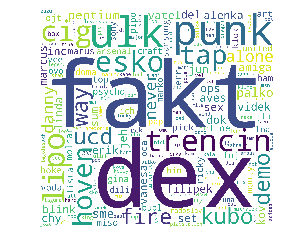

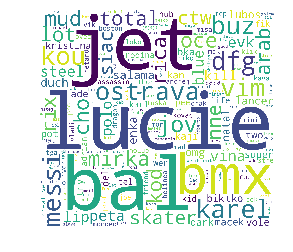

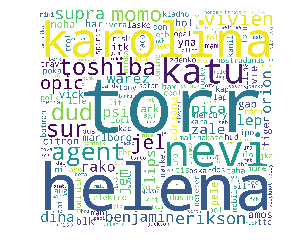

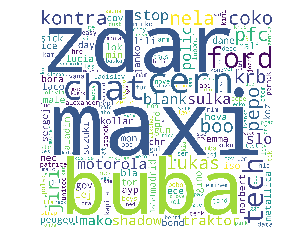

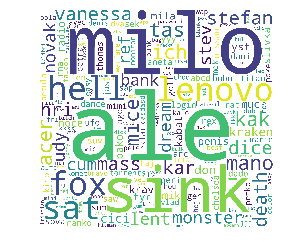

IndexError: index 5 is out of bounds for axis 0 with size 5

In [331]:
import matplotlib.pyplot as plt
for t in range(0,19):
    Kmeans=[]
    for i in range(0,200):
        Kmeans.append(ldaint.show_topic(t, 200)[i][0])
        Kmeans
    plt.figure()
    wordcloudK = WordCloud(background_color="white",width=2000, height=1860, margin=1).generate(" ".join(Kmeans))
    plt.imshow(wordcloudK)
    plt.axis("off")
    plt.show()
   # plt.title("Topic #" + str(t))
    plt.show()

In [17]:
coun = 0
for i in clusters:
    if(i == 0):
        coun = coun+1
coun

36551

In [18]:
for i in df_tfidf_matrix[0][1:10]:
    if(i!=0):
        print(i)

In [19]:
news = {'date': dates,'articlecode': articlecodes, 'title': titles,'text': texts,'cluster': clusters}
frame = pd.DataFrame(news, index = [clusters], columns = ['date','articlecode','title','text','cluster'])

NameError: name 'dates' is not defined

https://github.com/llSourcell/Latent_Dirichlet_Allocation/blob/master/NewAnalysis-Normal.ipynb

#  LDA
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ 


In [343]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [245]:
import pickle
with open('../data/data.pickle', 'rb') as f:
  data = pickle.load(f)

In [246]:
words = data['extrawordsplit']
print(words)

0         [v, 76, sz, xao, q, 9]
1                [milan, ek, 22]
2             [pan, chart, 1983]
3             [pi, pink, a, 123]
4                      [bulldog]
5        [nere, knu, 9558285913]
6                  [bl, by, sek]
7                 [123456, a, 7]
8                  [lumpy, 1976]
9                  [simon, m, 4]
10                  [kur, vicky]
11                [mlgqtazy, 05]
12       [pema, kuh, a, 2834, @]
13                 [fer, b, man]
14                      [131619]
15                 [detail, ist]
16                 [debus, trol]
17               [mixvibes, 123]
18                      [161616]
19                [hob, lly, 11]
20                 [stano, 2724]
21                    [19901807]
22                     [2925845]
23             [je, sen, jet, u]
24                      [565455]
25                  [ubopriqpjq]
26        [mvl, jb, 3, e, 8, zs]
27                    [12082389]
28                 [tomas, 2008]
29               [jde, mena, to]
          

In [24]:
#withoutint=words
#for a in withoutint:
#    for b in a:
#        if b in integers:
#            a=[x for x in a if x!= b]
        

# LDA without numbers 

In [247]:
data["nointegers"] = ""

import wordsegment as ws

from wordsegment import load, segment

load()
  
def flat(l):
    for k in l:
        if not isinstance(k, (list, tuple)):
            yield k
        else:
            yield from flat(k)
  
for index, row in data.iterrows():
  row['nointegers'] = re.findall(r'[a-zA-Z]+|[^a-zA-Z0-9]+',row['original'])
  passwdstring=[]
  for i in row['nointegers']:
     templist = segment(i)
     if(templist):
       passwdstring.append(templist)
     else:
       passwdstring.append(i)
  row['nointegers'] = list(flat(passwdstring))
  


In [249]:
datawithoutintegers=data["nointegers"]
datawithoutintegers

0               [v, sz, xao, q]
1                   [milan, ek]
2                  [pan, chart]
3                 [pi, pink, a]
4                     [bulldog]
5                   [nere, knu]
6                 [bl, by, sek]
7                           [a]
8                       [lumpy]
9                    [simon, m]
10                 [kur, vicky]
11                   [mlgqtazy]
12            [pema, kuh, a, @]
13                [fer, b, man]
14                           []
15                [detail, ist]
16                [debus, trol]
17                   [mixvibes]
18                           []
19                   [hob, lly]
20                      [stano]
21                           []
22                           []
23            [je, sen, jet, u]
24                           []
25                 [ubopriqpjq]
26             [mvl, jb, e, zs]
27                           []
28                      [tomas]
29              [jde, mena, to]
                  ...          
38620   

In [250]:
#( Create Dictionary )
len(terms)
x = []
for item in terms:
    x.append(item)
y = np.array(x)
why=y.flatten()
z=list(y)
z
#words = []
#for word in terms:
#words.append(word)
#words
###I create a dictionary
id2word = corpora.Dictionary(words)
print(id2word)

#dic = corpora.Dictionary([why.split()])
# Create Corpus
#texts = data_lemmatized

### Term Document Frequency
corpus = [id2word.doc2bow(terms) for text in terms]

#corpus = [id2word.doc2bow(tokenize(t)) for t in terms]
# View
#print(corpus[:1])
dictionary = id2word 

Dictionary(28270 unique tokens: ['76', '9', 'q', 'sz', 'v']...)


In [252]:
### This function gets rid of the most extreme elements in the dictonary
dictionary.filter_extremes(no_below=1, no_above=0.8)

dictionary without numbers, i call it dictionarywithout

In [253]:
id2wordint = corpora.Dictionary(datawithoutintegers)
print(id2wordint)

dictionaryint = id2wordint 
dictionaryint.filter_extremes(no_below=1, no_above=0.8)

Dictionary(19155 unique tokens: ['q', 'sz', 'v', 'xao', 'ek']...)


In [254]:
corpusint = [id2wordint.doc2bow(terms) for text in terms]

LDA without integers

In [275]:
from gensim import corpora, models
ldaint = models.LdaModel(corpusint, num_topics=5, id2word=dictionaryint, update_every=5, chunksize=10000, passes=100)

In [276]:
ldaint.show_topics()
print(ldaint[corpusint[0]])

[(0, 0.22944225), (1, 0.24298099), (2, 0.19654526), (3, 0.17939933), (4, 0.1516322)]


In [277]:
topicsint = ldaint.print_topics(5,num_words=20)
print(topicsint)

[(0, '0.001*"fakt" + 0.001*"dex" + 0.001*"punk" + 0.001*"ulk" + 0.001*"trencin" + 0.001*"lipo" + 0.001*"cig" + 0.001*"esko" + 0.001*"tap" + 0.001*"hoven" + 0.001*"kubo" + 0.001*"ucd" + 0.001*"demo" + 0.001*"way" + 0.001*"fire" + 0.001*"alone" + 0.001*"never" + 0.001*"danny" + 0.001*"pentium" + 0.001*"sme"'), (1, '0.001*"lucie" + 0.001*"jet" + 0.001*"bal" + 0.001*"bmx" + 0.001*"ostrava" + 0.001*"dfg" + 0.001*"karel" + 0.001*"buz" + 0.001*"kou" + 0.001*"messi" + 0.001*"vim" + 0.001*"jov" + 0.001*"mirka" + 0.001*"mud" + 0.001*"oce" + 0.001*"cho" + 0.001*"total" + 0.001*"arab" + 0.001*"lot" + 0.001*"was"'), (2, '0.001*"torr" + 0.001*"helena" + 0.001*"karolina" + 0.001*"nevi" + 0.001*"katu" + 0.001*"agent" + 0.001*"most" + 0.001*"toshiba" + 0.001*"dud" + 0.001*"sur" + 0.001*"momo" + 0.001*"vivien" + 0.001*"jel" + 0.001*"opic" + 0.001*"supra" + 0.001*"erikson" + 0.001*"benjamin" + 0.001*"dina" + 0.001*"zale" + 0.001*"lep"'), (3, '0.001*"maxi" + 0.001*"zdar" + 0.001*"buba" + 0.001*"cern" + 0.

In [278]:
from wordcloud import WordCloud


In [274]:
#top=[]
#for i in range(0,200):
#     top.append(ldaint.show_topic(t, 200)[i][0])
#top

In [269]:
ldaint.show_topic(1, 200)[1][0]

'manko'

In [270]:
len(topics_matrixint[0][1])

200

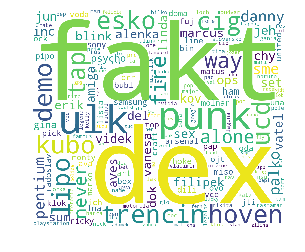

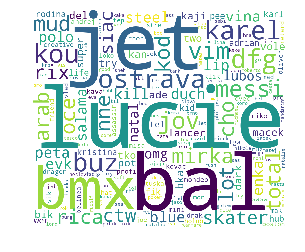

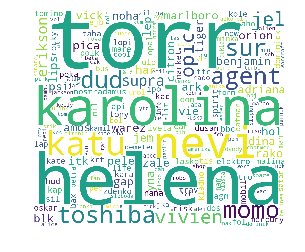

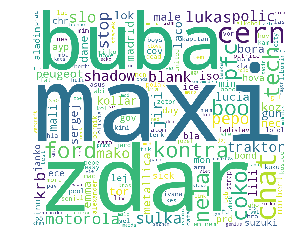

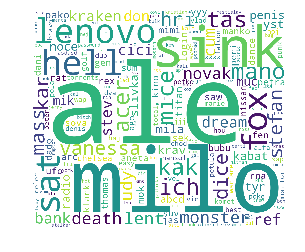

In [279]:
import matplotlib.pyplot as plt
for t in range(ldaint.num_topics):
    top=[]
    for i in range(0,200):
        top.append(ldaint.show_topic(t, 200)[i][0])
        top
    plt.figure()
    wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=1).generate(" ".join(top))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
   # plt.title("Topic #" + str(t))
    plt.show()

In [117]:
for t in range(ldaint.num_topics):
    top=[]
    for i in range(0,200):
        top.append(ldaint.show_topic(t, 200)[i][0])
        top
top

['filmy',
 'real',
 'dem',
 'gun',
 'jem',
 'naj',
 'komet',
 'abu',
 'prochazka',
 'ktm',
 'joj',
 'martin',
 'zuzu',
 'pas',
 'amerika',
 'torrenty',
 'may',
 'body',
 'pata',
 'stre',
 'demeter',
 'kras',
 'hov',
 'dusk',
 'kubik',
 'viktor',
 'bus',
 'lier',
 'orange',
 'vine',
 'tpu',
 'jep',
 'marian',
 'michal',
 'tus',
 'aud',
 'robin',
 'name',
 'world',
 'zev',
 'fly',
 'playstation',
 'viper',
 'ich',
 'moc',
 'kika',
 'zahra',
 'jov',
 'kot',
 'pot',
 'lucie',
 'teo',
 'mud',
 'pedro',
 'ferrari',
 'stev',
 'jozef',
 'jahoda',
 'marina',
 'pup',
 'line',
 'kapitan',
 'sergej',
 'link',
 'lampard',
 'mark',
 'ady',
 'gen',
 'kin',
 'cul',
 'asko',
 'tek',
 'andrea',
 'mazda',
 'genius',
 'tik',
 'charmed',
 'uci',
 'pro',
 'jerry',
 'dab',
 'merida',
 'katu',
 'jaroslav',
 'low',
 'mon',
 'famous',
 'fds',
 'shop',
 'amiga',
 'laco',
 'mini',
 'ivan',
 'maty',
 'lako',
 'kid',
 'banan',
 'liv',
 'milad',
 'mis',
 'erikson',
 'stalker',
 'luki',
 'terminator',
 'rap',
 'zoo',

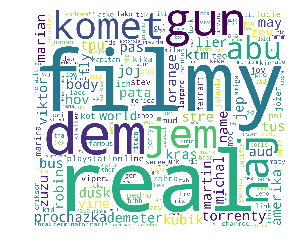

In [122]:
#wordcloud = WordCloud(max_font_size=40).top
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(" ".join(top))
wordcloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [339]:
import pyLDAvis
#import pyLDAvis.gensim  

ModuleNotFoundError: No module named 'pyLDAvis'

In [333]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldaint, corpusint, id2wordint)
vis

NameError: name 'pyLDAvis' is not defined

In [102]:
import matplotlib.pyplot as plt
for t in range(ldaint.num_topics):
    plt.figure()
    #plt.imshow(WordCloud().fit_words(top))
    plt.imshow(WordCloud.fit_words(ldaint.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

TypeError: fit_words() missing 1 required positional argument: 'frequencies'

<Figure size 432x288 with 0 Axes>

In [91]:
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import os
from os import path
from time import sleep
import matplotlib.pyplot as plt
import random


In [76]:
ldaint.show_topic(t, 200)[3][0]

'dark'

In [55]:
topics_matrixint = ldaint.show_topics(formatted=False, num_words=200)
#topics_matrix = lda.show_topics(formatted=False)
print(topics_matrixint)

[(0, [('vase', 0.00068273174), ('jaja', 0.0006555289), ('kove', 0.0006404145), ('dark', 0.0006346339), ('qoq', 0.00062580284), ('side', 0.0006196453), ('vjs', 0.0006190802), ('tara', 0.0006134332), ('natalie', 0.0006089146), ('benjamin', 0.000608616), ('tenis', 0.0006081128), ('xxx', 0.000607623), ('slovakia', 0.0006069343), ('tas', 0.0006069333), ('karel', 0.0006068468), ('mtu', 0.0006056137), ('kristin', 0.0006011241), ('mur', 0.0006010237), ('dad', 0.00060075225), ('wow', 0.0005999957), ('kop', 0.00059555616), ('such', 0.00059512904), ('future', 0.00059408165), ('majko', 0.00059300364), ('sonyericsson', 0.0005918317), ('wjz', 0.0005909322), ('bvc', 0.00059005595), ('bela', 0.000589306), ('nek', 0.0005892111), ('radko', 0.0005887052), ('pis', 0.0005860827), ('jira', 0.0005856608), ('nak', 0.00058408536), ('dead', 0.0005820783), ('eda', 0.000581155), ('ali', 0.00058091315), ('ent', 0.000580797), ('mirin', 0.0005806235), ('porn', 0.0005805823), ('bmw', 0.0005802551), ('den', 0.00057982

In [391]:
topics_matrixint[0][1]

[('mustang', 0.0006744487),
 ('dandy', 0.0006591198),
 ('fig', 0.00065717916),
 ('vel', 0.00065488),
 ('demon', 0.0006527296),
 ('dod', 0.00065143546),
 ('krb', 0.0006507236),
 ('dobro', 0.00064428226),
 ('gul', 0.0006433006),
 ('lucie', 0.00063706434),
 ('blank', 0.0006347285),
 ('van', 0.0006330831),
 ('inc', 0.00062695815),
 ('emo', 0.00061870646),
 ('martina', 0.0006180861),
 ('opel', 0.0006107801),
 ('matrix', 0.0006102649),
 ('pri', 0.0006096366),
 ('stahuj', 0.0006083969),
 ('dance', 0.00060776103),
 ('banik', 0.00060605246),
 ('nikola', 0.0006044633),
 ('good', 0.0006014712),
 ('palko', 0.00059958745),
 ('moj', 0.0005987763),
 ('pice', 0.0005986565),
 ('eminem', 0.0005972138),
 ('tra', 0.0005970574),
 ('filipek', 0.0005947641),
 ('dna', 0.0005937441),
 ('jiri', 0.0005934144),
 ('ross', 0.0005927183),
 ('polo', 0.00059251196),
 ('apt', 0.0005917924),
 ('yamaha', 0.00059085526),
 ('kur', 0.00059051445),
 ('her', 0.0005903485),
 ('huli', 0.0005896389),
 ('cic', 0.0005885829),
 ('u

In [392]:
topics_matrixint[1][1]

[('tri', 0.00070405495),
 ('qfe', 0.00065625657),
 ('ule', 0.0006561325),
 ('vlc', 0.0006555311),
 ('modra', 0.000652134),
 ('svr', 0.00064828625),
 ('kana', 0.00064658263),
 ('jez', 0.0006429895),
 ('ver', 0.0006378455),
 ('imta', 0.0006344903),
 ('jedna', 0.0006292335),
 ('ttc', 0.00062826875),
 ('cal', 0.0006278601),
 ('lubin', 0.0006242088),
 ('msn', 0.0006228155),
 ('min', 0.0006169919),
 ('dak', 0.0006149662),
 ('panasonic', 0.00061439053),
 ('punk', 0.0006138238),
 ('dada', 0.0006133695),
 ('rider', 0.00061332365),
 ('vatel', 0.00061168836),
 ('kolka', 0.0006111623),
 ('zig', 0.0006097571),
 ('torrents', 0.00060921046),
 ('mire', 0.00060918514),
 ('som', 0.0006080058),
 ('brus', 0.00060774264),
 ('legend', 0.0006074822),
 ('titanic', 0.0006065721),
 ('slovakia', 0.0006063662),
 ('xxx', 0.0006049616),
 ('tere', 0.0006030616),
 ('marek', 0.0006002595),
 ('ovc', 0.00060016115),
 ('blood', 0.0005983287),
 ('killer', 0.00059776206),
 ('manowar', 0.0005975981),
 ('jeh', 0.0005972674),

In [393]:
topics_matrixint[2][1]

[('ads', 0.0006915739),
 ('bos', 0.00067259464),
 ('nka', 0.00065477175),
 ('hri', 0.00064628816),
 ('blink', 0.0006452092),
 ('koro', 0.00063514634),
 ('one', 0.0006338317),
 ('pir', 0.0006312597),
 ('windows', 0.00062595075),
 ('tba', 0.000625389),
 ('gas', 0.00062537944),
 ('koc', 0.00062229944),
 ('lip', 0.00062226737),
 ('vic', 0.0006202906),
 ('park', 0.0006174485),
 ('siac', 0.0006159961),
 ('ion', 0.00061442144),
 ('apo', 0.00061364577),
 ('bat', 0.0006115935),
 ('take', 0.000606718),
 ('xxxx', 0.0006055031),
 ('hal', 0.00060530764),
 ('kala', 0.0006032233),
 ('lek', 0.0006026976),
 ('pool', 0.0006011928),
 ('loch', 0.0006009101),
 ('day', 0.0005998375),
 ('poli', 0.0005995275),
 ('mikes', 0.00059906003),
 ('rna', 0.00059614505),
 ('racek', 0.00059516286),
 ('blb', 0.00059275207),
 ('para', 0.0005926999),
 ('sul', 0.00059213483),
 ('sokol', 0.0005921333),
 ('kama', 0.0005913072),
 ('danka', 0.000591264),
 ('rat', 0.00059046154),
 ('boston', 0.0005894072),
 ('lub', 0.00058807567

In [394]:
topics_matrixint[3][1]

[('system', 0.00069798477),
 ('lentil', 0.0006900343),
 ('aladin', 0.00068105524),
 ('moro', 0.00067605503),
 ('moto', 0.00065942225),
 ('rik', 0.00064430747),
 ('tro', 0.0006379126),
 ('lee', 0.0006360768),
 ('eee', 0.0006344884),
 ('girl', 0.0006343241),
 ('luci', 0.0006301354),
 ('vane', 0.0006297075),
 ('lkj', 0.0006251879),
 ('rice', 0.0006203522),
 ('freedom', 0.0006196638),
 ('omg', 0.00061657286),
 ('thai', 0.0006154994),
 ('ban', 0.0006139044),
 ('cvi', 0.00061322126),
 ('nep', 0.00061275327),
 ('speed', 0.00060511834),
 ('elka', 0.00060482667),
 ('aug', 0.00059926865),
 ('have', 0.00059839303),
 ('pepo', 0.0005981191),
 ('fic', 0.00059801067),
 ('duro', 0.0005976749),
 ('sony', 0.0005972839),
 ('komo', 0.00059685693),
 ('aba', 0.00059637846),
 ('aged', 0.0005961494),
 ('god', 0.0005941232),
 ('kovi', 0.00059412204),
 ('metallica', 0.0005938005),
 ('radar', 0.0005933706),
 ('fol', 0.0005933117),
 ('agent', 0.00059145514),
 ('tatin', 0.00059080974),
 ('fifa', 0.00059007376),
 (

In [395]:
topics_matrixint[4][1]

[('david', 0.00066918123),
 ('berry', 0.00064593746),
 ('hhhh', 0.0006451971),
 ('bin', 0.000630944),
 ('kore', 0.0006283017),
 ('opic', 0.0006262734),
 ('bed', 0.0006216532),
 ('blade', 0.0006180161),
 ('pras', 0.0006137188),
 ('noce', 0.0006125175),
 ('lava', 0.0006121325),
 ('lick', 0.00061207253),
 ('rum', 0.0006114579),
 ('movie', 0.0006112116),
 ('kad', 0.0005981499),
 ('prx', 0.0005960911),
 ('mick', 0.00059564266),
 ('roz', 0.0005956089),
 ('race', 0.00059511303),
 ('har', 0.0005945854),
 ('mati', 0.00059385895),
 ('katu', 0.00059381017),
 ('karel', 0.0005928858),
 ('west', 0.00059251837),
 ('nemo', 0.00059175194),
 ('stanislav', 0.000590834),
 ('ivana', 0.00059081917),
 ('kovac', 0.00059055514),
 ('jist', 0.000589681),
 ('svk', 0.00058560335),
 ('naruto', 0.0005853027),
 ('kow', 0.00058476004),
 ('ati', 0.0005842364),
 ('dane', 0.00058413745),
 ('skal', 0.0005825542),
 ('hoven', 0.00058245007),
 ('sky', 0.00058173947),
 ('bur', 0.0005814459),
 ('mandarin', 0.0005803716),
 ('ja

# The function below is the LDA model for all data

In [374]:
from gensim import corpora, models
lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=2)

In [375]:
lda.show_topics()
print(lda[corpus[0]])

[(0, 0.19146156), (1, 0.18024363), (2, 0.21987581), (3, 0.2423086), (4, 0.16611043)]


In [376]:
#topics = lda.print_topics(5)
topics = lda.print_topics(5,num_words=20)
print(topics)

[(0, '0.001*"tub" + 0.001*"singer" + 0.001*"igor" + 0.001*"marlboro" + 0.001*"odd" + 0.001*"lista" + 0.001*"petula" + 0.001*"dani" + 0.001*"saurus" + 0.001*"chan" + 0.001*"dada" + 0.001*"niko" + 0.001*"202" + 0.001*"fight" + 0.001*"maniak" + 0.001*"nka" + 0.001*"kula" + 0.001*"tep" + 0.001*"023" + 0.001*"uss"'), (1, '0.001*"ana" + 0.001*"juro" + 0.001*"halo" + 0.001*"jms" + 0.001*"facebook" + 0.001*"500" + 0.001*"900" + 0.001*"1986" + 0.001*"falcon" + 0.001*"rado" + 0.001*"nostradamus" + 0.001*"mobil" + 0.001*"ion" + 0.001*"pivo" + 0.001*"raptor" + 0.001*"turbo" + 0.001*"rangers" + 0.001*"dae" + 0.001*"ist" + 0.001*"bol"'), (2, '0.001*"petra" + 0.001*"est" + 0.001*"1111" + 0.001*"bet" + 0.001*"riso" + 0.001*"uch" + 0.001*"1987" + 0.001*"kle" + 0.001*"jura" + 0.001*"steel" + 0.001*"1962" + 0.001*"kimi" + 0.001*"sla" + 0.001*"mila" + 0.001*"1234" + 0.001*"pig" + 0.001*"1982" + 0.001*"12345" + 0.001*"eli" + 0.001*"kor"'), (3, '0.001*"235" + 0.001*"zik" + 0.001*"prs" + 0.001*"jep" + 0.001*

In [377]:
topics_matrix = lda.show_topics(formatted=False, num_words=200)
#topics_matrix = lda.show_topics(formatted=False)
print(topics_matrix)

[(0, [('tub', 0.0006414858), ('singer', 0.0005975064), ('igor', 0.00058238994), ('marlboro', 0.0005823054), ('odd', 0.0005812178), ('lista', 0.00057175447), ('petula', 0.00056367216), ('dani', 0.0005627339), ('saurus', 0.0005574961), ('chan', 0.00055590534), ('dada', 0.00055008684), ('niko', 0.0005487613), ('202', 0.0005471186), ('fight', 0.0005471121), ('maniak', 0.0005445659), ('nka', 0.00054338854), ('kula', 0.0005424992), ('tep', 0.0005422193), ('023', 0.0005400305), ('uss', 0.0005371592), ('ste', 0.0005361491), ('lusk', 0.0005359626), ('burg', 0.0005357564), ('307', 0.0005353576), ('rock', 0.00053336134), ('tibi', 0.0005333048), ('asd', 0.0005323701), ('radek', 0.0005316966), ('stevo', 0.0005308729), ('krokodil', 0.0005307044), ('vod', 0.0005305609), ('cesta', 0.000530109), ('1973', 0.0005294952), ('qfe', 0.00052918383), ('mat', 0.00052839343), ('iti', 0.00052731764), ('vick', 0.0005257102), ('2224', 0.0005256607), ('dlo', 0.00052413), ('jen', 0.00052409986), ('dodo', 0.0005235362

In [314]:
#topics_matrix=np.array(topics_matrix)

In [378]:
len(topics_matrix[3][1])


200

This is the list of words beloning to the first topic

In [379]:
topics_matrix[0][1]

[('tub', 0.0006414858),
 ('singer', 0.0005975064),
 ('igor', 0.00058238994),
 ('marlboro', 0.0005823054),
 ('odd', 0.0005812178),
 ('lista', 0.00057175447),
 ('petula', 0.00056367216),
 ('dani', 0.0005627339),
 ('saurus', 0.0005574961),
 ('chan', 0.00055590534),
 ('dada', 0.00055008684),
 ('niko', 0.0005487613),
 ('202', 0.0005471186),
 ('fight', 0.0005471121),
 ('maniak', 0.0005445659),
 ('nka', 0.00054338854),
 ('kula', 0.0005424992),
 ('tep', 0.0005422193),
 ('023', 0.0005400305),
 ('uss', 0.0005371592),
 ('ste', 0.0005361491),
 ('lusk', 0.0005359626),
 ('burg', 0.0005357564),
 ('307', 0.0005353576),
 ('rock', 0.00053336134),
 ('tibi', 0.0005333048),
 ('asd', 0.0005323701),
 ('radek', 0.0005316966),
 ('stevo', 0.0005308729),
 ('krokodil', 0.0005307044),
 ('vod', 0.0005305609),
 ('cesta', 0.000530109),
 ('1973', 0.0005294952),
 ('qfe', 0.00052918383),
 ('mat', 0.00052839343),
 ('iti', 0.00052731764),
 ('vick', 0.0005257102),
 ('2224', 0.0005256607),
 ('dlo', 0.00052413),
 ('jen', 0.0

In [ ]:
for s in terms
   if 

In [ ]:
#terms

In [111]:
#for i in len(topics_matrix)
topicsone=[]
 
for t in range(0,20):
    a=topics_matrix[3][1][t][0]
    topicsone.append(a)

print(topicsone)

#topicscone


['uss', 'bnm', '1302', 'death', 'kove', 'ety', 'mila', 'stra', 'honda', 'fern', 'linda', 'mac', 'tep', 'deck', 'fry', 'cis', '311', 'gas', 'sabi', 'nez']


In [106]:
type( topics_matrix[0][1])

list

In [297]:
#topics_matrix.shape

I want to get the first column, they form first topic

In [ ]:
for i in topic_words:
    print([str(word) for word in i])
    print()

Here, we split data into numbers and words

In [256]:
from collections import defaultdict
d = defaultdict(list)
for x in terms:
   d[type(x)].append(x)

print(d[int])
print(d[str])

[]


In [246]:
integers=terms[1:302]
#integers

notint=terms[303:len(terms)]
#notint

In [173]:
integersindex=[]
listint=['0','1','2','3','4','5','6','7','8','9']
#a='0'

for a in listint:
    for t in range(0,len(terms)):
        if a in terms[t]:   
            integersindex.append(t)

      

In [299]:
#np.unique(integersindex).tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [174]:
integers=[]
for i in np.unique(integersindex):
    integers.append(terms[i])
integers

['000',
 '0000',
 '001',
 '002',
 '003',
 '005',
 '007',
 '008',
 '009',
 '0101',
 '011',
 '012',
 '0123',
 '0123456789',
 '023',
 '100',
 '1000',
 '101',
 '1010',
 '1012',
 '102',
 '105',
 '107',
 '110',
 '1109',
 '111',
 '1111',
 '111111',
 '112',
 '1122',
 '112233',
 '113',
 '114',
 '117',
 '118',
 '1188',
 '120',
 '1200',
 '1205',
 '1208',
 '121',
 '1212',
 '122',
 '1224',
 '123',
 '123 abc',
 '1231',
 '123123',
 '12321',
 '123321',
 '1234',
 '12344321',
 '12345',
 '123456',
 '1234567',
 '12345678',
 '123456789',
 '1234567890',
 '1235',
 '123654',
 '123654789',
 '123789',
 '124',
 '125',
 '128',
 '129',
 '1302',
 '131',
 '132',
 '133',
 '13579',
 '138',
 '1411',
 '142',
 '144',
 '146',
 '147',
 '147258369',
 '148',
 '1488',
 '150',
 '1501',
 '1502',
 '151',
 '1512',
 '1515',
 '152',
 '155',
 '156',
 '157',
 '158',
 '159',
 '159357',
 '159753',
 '1605',
 '1608',
 '1610',
 '1616',
 '162',
 '164',
 '172',
 '178',
 '1808',
 '181',
 '1810',
 '182',
 '184',
 '189',
 '1902',
 '1905',
 '19

In [175]:
wordindex=[]

for a in range(0,len(terms)):
        if a not in integersindex:   
             wordindex.append(a)

In [ ]:
#wordindex

In [177]:
wordd=[]
for i in np.unique(wordindex):
    wordd.append(terms[i])
wordd

['aaa',
 'aaaa',
 'aba',
 'abc',
 'abcd',
 'abec',
 'abec eda',
 'abi',
 'abu',
 'ace',
 'acer',
 'ach',
 'aci',
 'ack',
 'ada',
 'adam',
 'adamek',
 'ade',
 'adel',
 'adidas',
 'adk',
 'adlo',
 'admin',
 'ado',
 'adrian',
 'adriana',
 'ads',
 'ady',
 'age',
 'aged',
 'agent',
 'agm',
 'ago',
 'aho',
 'air',
 'airsoft',
 'aja',
 'ajo',
 'aka',
 'ako',
 'aladin',
 'alan',
 'ale',
 'alena',
 'alenka',
 'ales',
 'alex',
 'alexander',
 'alfa',
 'alfa romeo',
 'ali',
 'alice',
 'alien',
 'alka',
 'alkohol',
 'all',
 'alone',
 'alz',
 'amd',
 'amerika',
 'amiga',
 'amos',
 'ana',
 'ana konda',
 'anabel',
 'anc',
 'and',
 'and ulk',
 'andrea',
 'andreas',
 'andrej',
 'android',
 'andy',
 'anek',
 'aneta',
 'angel',
 'ani',
 'anika',
 'anka',
 'ann',
 'anna',
 'ant',
 'anti',
 'any',
 'api',
 'apo',
 'app',
 'apr',
 'apt',
 'arab',
 'arc',
 'are',
 'arg',
 'ari',
 'arik',
 'ark',
 'arm',
 'arm aged',
 'arsenal',
 'art',
 'asd',
 'asdasd',
 'asdf',
 'asdf jkl',
 'ask',
 'asko',
 'aspire',
 'ass

# some tries, but im trying above to work

In [216]:
#myIntList = [x for x in terms if isinstance(x, int)]
#myIntList
#myStrList = [x for x in terms if isinstance(x, str)]
#myStrList


In [77]:
topics_matrix.shape( (5,20,2) )

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
[x for x,_ in topics_matrix[0]]


#topics_matrix = np.array(topics_matrix)

#topic_words = topics_matrix[:,:,1]

In [52]:
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [53]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [80]:
#Latent Dirichlet Allocation implementation with Gensim
import nltk
from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in terms]
preprocess

#%time tokenized_terms = [tokenize_and_stem(terms) for terms in preprocess]

#%time terms = [[word for word in terms if word not in my_stop_words] for terms in tokenized_terms]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'abc',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [86]:
import array as arr
#print(len(terms))
import numpy as np
dup=np.asarray(terms)
#dupa=arr.array(terms)
dup

array(['000', '0000', '001', ..., 'zuzu', 'zvolen', 'zzz'], dtype='<U13')

In [90]:
dic = corpora.Dictionary([a.split()])

NameError: name 'a' is not defined

# this code generates random passwords

In [329]:
import string
from random import *
characters = string.ascii_letters + string.punctuation  + string.digits
password =  "".join(choice(characters) for x in range(randint(8, 16)))
print (password)

o6{|+JhYA{StY
